<a href="https://colab.research.google.com/github/rizkinahayyuni/big-data-uas/blob/main/UAS_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%load_ext google.colab.data_table

In [5]:
%%bigquery --project big-data-1-347603
SELECT *
FROM `uas_covid.recent_data`

,date,region_name,total_confirmed_cases,recovered,deaths
0,2022-06-28 17:00:00+00:00,Valle d'Aosta,37689,36453,537
1,2022-06-28 17:00:00+00:00,Piemonte,1243317,1191411,13469
2,2022-06-28 17:00:00+00:00,Lombardia,3014117,2891340,40807
3,2022-06-28 17:00:00+00:00,Liguria,471565,452937,5352
4,2022-06-28 17:00:00+00:00,Sardegna,345736,320324,2514
5,2022-06-28 17:00:00+00:00,Emilia-Romagna,1558499,1498585,17089
6,2022-06-28 17:00:00+00:00,Toscana,1202967,1145270,10165
7,2022-06-28 17:00:00+00:00,P.A. Bolzano,225839,220307,1485
8,2022-06-28 17:00:00+00:00,P.A. Trento,173644,168762,1569
9,2022-06-28 17:00:00+00:00,Veneto,1842379,1764591,14794


In [6]:
from google.cloud import bigquery

client = bigquery.Client(project='big-data-1-347603')

df = client.query('''
  SELECT
    *
  FROM
    `uas_covid.recent_data`
''').to_dataframe()

df

,date,region_name,total_confirmed_cases,recovered,deaths
0,2022-06-28 17:00:00+00:00,Valle d'Aosta,37689,36453,537
1,2022-06-28 17:00:00+00:00,Piemonte,1243317,1191411,13469
2,2022-06-28 17:00:00+00:00,Lombardia,3014117,2891340,40807
3,2022-06-28 17:00:00+00:00,Liguria,471565,452937,5352
4,2022-06-28 17:00:00+00:00,Sardegna,345736,320324,2514
5,2022-06-28 17:00:00+00:00,Emilia-Romagna,1558499,1498585,17089
6,2022-06-28 17:00:00+00:00,Toscana,1202967,1145270,10165
7,2022-06-28 17:00:00+00:00,P.A. Bolzano,225839,220307,1485
8,2022-06-28 17:00:00+00:00,P.A. Trento,173644,168762,1569
9,2022-06-28 17:00:00+00:00,Veneto,1842379,1764591,14794


In [16]:
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Recovered')

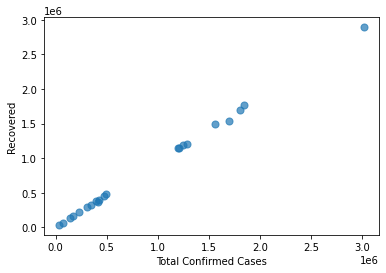

In [17]:
points = df.iloc[:, 2:4].values
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Recovered')

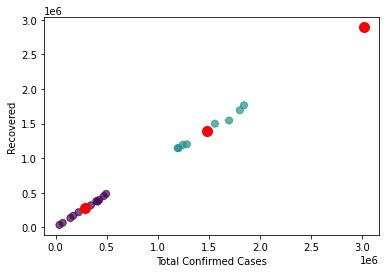

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Recovered')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Text(0, 0.5, 'Deaths')

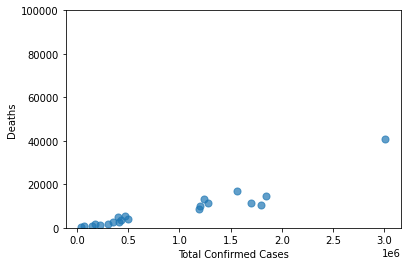

In [31]:
points = df.iloc[:, 2:5].values
x = points[:, 0]
y = points[:, 2]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.ylim(0, 100000)
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Deaths')

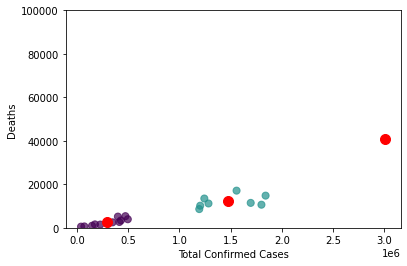

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
 
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.ylim(0, 100000)
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Deaths')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=100)